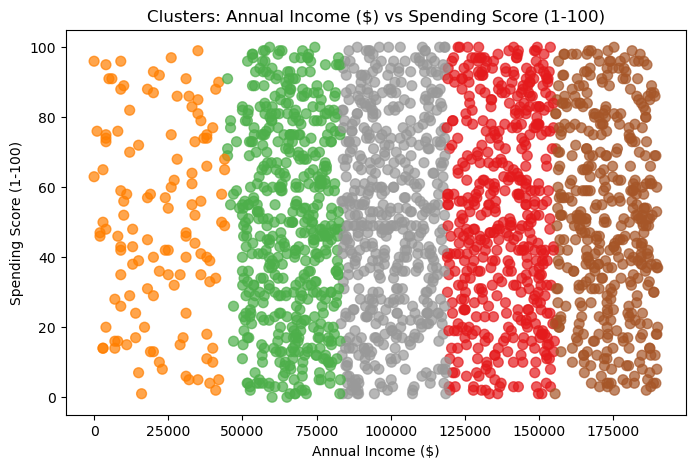


Overall mean values for Annual Income ($) and Spending Score (1-100):
Annual Income ($)         110731.8215
Spending Score (1-100)        50.9625
dtype: float64

Cluster mean values:
         Annual Income ($)  Spending Score (1-100)
Cluster                                           
0            137666.912017               52.381974
1             66201.625251               49.444890
2             22467.741935               49.693548
3            173022.524038               51.098558
4            100026.022222               51.359596

Cluster sizes:
Cluster
0    466
1    499
2    124
3    416
4    495
Name: count, dtype: int64

Difference from overall mean:
         Annual Income ($)  Spending Score (1-100)
Cluster                                           
0             26935.090517                1.419474
1            -44530.196249               -1.517610
2            -88264.079565               -1.268952
3             62290.702538                0.136058
4            -10705.799278 

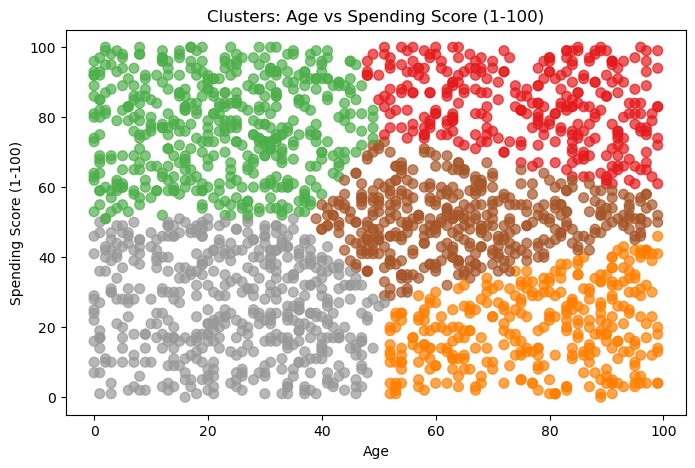


Overall mean values for Age and Spending Score (1-100):
Age                       48.9600
Spending Score (1-100)    50.9625
dtype: float64

Cluster mean values:
               Age  Spending Score (1-100)
Cluster                                   
0        76.272131               83.442623
1        22.424370               77.079832
2        77.723926               19.806748
3        65.118932               50.538835
4        24.565489               26.000000

Cluster sizes:
Cluster
0    305
1    476
2    326
3    412
4    481
Name: count, dtype: int64

Difference from overall mean:
               Age  Spending Score (1-100)
Cluster                                   
0        27.312131               32.480123
1       -26.535630               26.117332
2        28.763926              -31.155752
3        16.158932               -0.423665
4       -24.394511              -24.962500

--- Business Insights ---
Cluster 0: High Age, High Spending Score (1-100), Size: 305
Cluster 1: Low Age, Hig

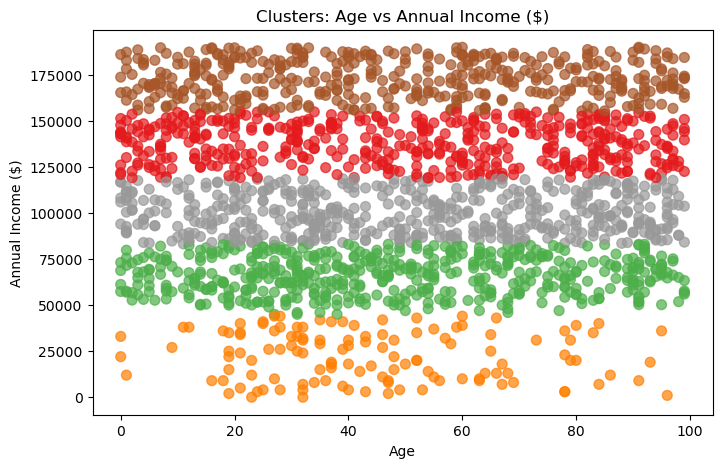


Overall mean values for Age and Annual Income ($):
Age                      48.9600
Annual Income ($)    110731.8215
dtype: float64

Cluster mean values:
               Age  Annual Income ($)
Cluster                              
0        49.742489      137666.912017
1        48.006012       66201.625251
2        44.201613       22467.741935
3        48.512019      173022.524038
4        50.753535      100026.022222

Cluster sizes:
Cluster
0    466
1    499
2    124
3    416
4    495
Name: count, dtype: int64

Difference from overall mean:
              Age  Annual Income ($)
Cluster                             
0        0.782489       26935.090517
1       -0.953988      -44530.196249
2       -4.758387      -88264.079565
3       -0.447981       62290.702538
4        1.793535      -10705.799278

--- Business Insights ---
Cluster 0: High Age, High Annual Income ($), Size: 466
Cluster 1: Low Age, Low Annual Income ($), Size: 499
Cluster 2: Low Age, Low Annual Income ($), Size: 124
Cluste

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset

data = pd.read_csv("..\data\Customers.csv")

# Define function for clustering and analysis

def cluster_analysis(feature_x, feature_y, n_clusters=5):
    features = data[[feature_x, feature_y]]

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)

    # Plot clusters
    plt.figure(figsize=(8,5))
    plt.scatter(data[feature_x], data[feature_y],
                c=data['Cluster'], cmap='Set1', s=50, alpha=0.7)
    plt.title(f'Clusters: {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

    # Cluster summary
    cluster_summary = data.groupby('Cluster')[[feature_x, feature_y]].mean()
    cluster_size = data['Cluster'].value_counts().sort_index()
    overall_mean = features.mean()
    
    print(f"\nOverall mean values for {feature_x} and {feature_y}:")
    print(overall_mean)

    print(f"\nCluster mean values:")
    print(cluster_summary)

    print(f"\nCluster sizes:")
    print(cluster_size)

    cluster_diff = cluster_summary - overall_mean
    print(f"\nDifference from overall mean:")
    print(cluster_diff)

    # Business insights
    print("\n--- Business Insights ---")
    for idx, row in cluster_summary.iterrows():
        x_value = row[feature_x]
        y_value = row[feature_y]
        
        x_label = "High" if x_value > overall_mean[feature_x] else "Low"
        y_label = "High" if y_value > overall_mean[feature_y] else "Low"
        
        print(f"Cluster {idx}: {x_label} {feature_x}, {y_label} {feature_y}, Size: {cluster_size[idx]}")

    # Weighted score for targeting (Spending Score * Cluster Size)
    weighted_scores = cluster_summary[feature_y] * cluster_size
    target_cluster = weighted_scores.idxmax()
    print(f"\n**Recommended Target Cluster (weighted by size & profitability):** Cluster {target_cluster}")
    print(f"Average {feature_x}: {cluster_summary.loc[target_cluster, feature_x]:.2f}")
    print(f"Average {feature_y}: {cluster_summary.loc[target_cluster, feature_y]:.2f}")
    print(f"Cluster size: {cluster_size[target_cluster]}")
    print("=> Focus marketing/promotions on this cluster for maximum profit.\n")

# Run clustering for different feature pairs

cluster_analysis('Annual Income ($)', 'Spending Score (1-100)')
cluster_analysis('Age', 'Spending Score (1-100)')
cluster_analysis('Age', 'Annual Income ($)')
